# Introduction to regression trees & forests
Compiled by Mohamad Ali-Dib

Based on: 

http://web.as.uky.edu/statistics/users/pbreheny/764-F11/notes/11-3.pdf

https://blog.cambridgecoding.com/2016/01/03/getting-started-with-regression-and-decision-trees/

http://www.bios.unc.edu/~dzeng/BIOS740/randomforest.pdf

http://sli.ics.uci.edu/Classes/2015W-273a

![img1](images/img1.png)
![linreg](images/linreg.png)
![linreg2](images/linreg2.jpg)

## Regression trees

How do regression trees work ?

1- consider a linear regression problem with a continuous response z and two predictors x and y

2- We begin by splitting the space into two regions on the basis of a rule of the form $x,y \leq s$ , and modeling the response using the mean of z in the two regions

3- The optimal split (in terms of reducing the residual sum of squares) is found over all predictors (x and y) and all possible split points s

4- The process is then repeated in a recursive fashion for each of the two sub-regions

5- This process continues until some stopping rule is applied

6- For example, letting {Rm} denote the collection of rectangular partitions, we might continue partitioning until |Rm| = 10

7- The end result is a piecewise constant model over the
partition {Rm} of the form:

$$f(x,y)=\sum_{m} c_m I \ \ \ (x,y \ \epsilon \ R_m)  $$

where $c_m$ is the constant term for the $m^{th}$ region (i.e., the mean of $z_i$ for those observations $x,y \ \epsilon \ R_m$)

![img2](images/tree1.png)
![img3](images/tree2.png)


Numerical example:


![img4](images/tree3.png)
![img5](images/tree4.png)


# Regression trees with Python
## Simple example: 1  feature

In [85]:
# Import the plotting library

import matplotlib as mpl
mpl.rcParams['axes.color_cycle'] = ['#7FB5C7', '#E63E65', '#5B5BC9', '#55D957']
%matplotlib inline


In [86]:
# Import the data manipulation library and read the training set into a dataframe

import pandas as pd
bikes = pd.read_csv('data/bikes.csv')
bikes.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120
1,2011-01-04,2.896673,54.267219,15.136882,108
2,2011-01-05,4.235654,45.697702,17.034578,82
3,2011-01-06,3.112643,50.237349,10.091568,88
4,2011-01-07,2.723918,49.144928,15.738204,148


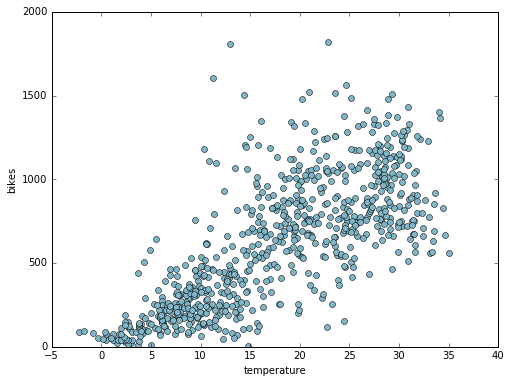

In [87]:
# Plot the data

from matplotlib import pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.show()

In [88]:
# Import the Decision Trees Regressor and train it !

from sklearn.tree import DecisionTreeRegressor
import numpy as np

regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(np.array([bikes['temperature']]).T, bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [89]:
regressor.predict(5.)

array([ 189.23183761])

In [90]:
regressor.predict(20.)

array([ 769.08756039])

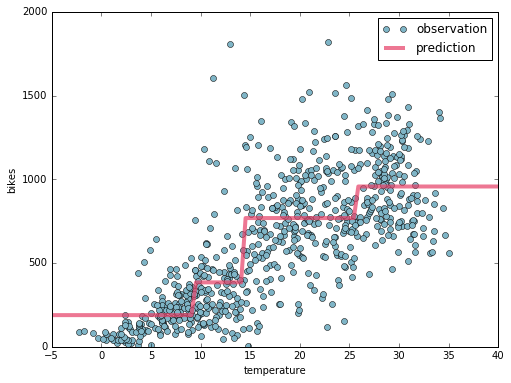

In [91]:
# plot the fit

xx = np.array([np.linspace(-5, 40, 100)]).T

plt.figure(figsize=(8,6))
plt.plot(bikes['temperature'], bikes['count'], 'o', label='observation')
plt.plot(xx, regressor.predict(xx), linewidth=4, alpha=.7, label='prediction')
plt.xlabel('temperature')
plt.ylabel('bikes')
plt.legend()
plt.show()

## Simple example: two features

![img434](images/two_trees.png)

In [92]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

bikes = pd.read_csv('data/bikes.csv')
regressor = DecisionTreeRegressor(max_depth=2)
regressor.fit(bikes[['temperature', 'humidity']], bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

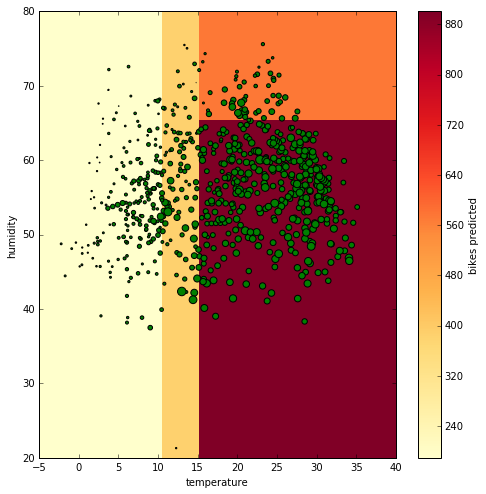

In [93]:
nx = 30
ny = 30
# creating a grid of points
x_temperature = np.linspace(-5, 40, nx)
y_humidity = np.linspace(20, 80, ny)
xx, yy = np.meshgrid(x_temperature, y_humidity)
# evaluating the regresson on all the points
z_bikes = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))


fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_temperature, y_humidity, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='bikes predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(bikes['temperature'], bikes['humidity'], s=bikes['count']/25.0, c='g')
# setting the limit for each axis
plt.xlim(np.min(x_temperature), np.max(x_temperature))
plt.ylim(np.min(y_humidity), np.max(y_humidity))
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.show()

plt.show()

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(bikes['count'], regressor.predict(bikes[['temperature','humidity']]))

181.28165652686295

In [95]:
from sklearn.cross_validation import cross_val_score
scores = -cross_val_score(regressor, bikes[['temperature', 'humidity']], 
                          bikes['count'], scoring='mean_absolute_error', cv=10)

In [96]:
scores.mean()

224.66188344455881

In [97]:
regressor2 = DecisionTreeRegressor(max_depth=100)
regressor2.fit(bikes[['temperature', 'humidity']], bikes['count'])

DecisionTreeRegressor(criterion='mse', max_depth=100, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [98]:
mean_absolute_error(bikes['count'], regressor2.predict(bikes[['temperature','humidity']]))

0.0

In [99]:
scores = -cross_val_score(regressor2, bikes[['temperature', 'humidity']], 
                          bikes['count'], scoring='mean_absolute_error', cv=10)
print scores.mean()

241.238655822


# Random forest regressors

RFRs work similarly to Random Forest Classifiers, except we average the output of the different trees instead of taking a majority vote.

1- Draw $n_{trees}$ bootstrap samples from the original data.

2- For each of the bootstrap samples, grow an unpruned classification or regression tree, with the following modification: at each node, rather than choosing the best split among all predictors, randomly sample $m_{try}$ of the predictors and choose the best split from among those variables.

3- Predict new data by aggregating the predictions of $n_{trees}$ trees (i.e., majority votes for classification, average for regression).

![rf](images/rf.png)

In [100]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

bikes = pd.read_csv('data/bikes.csv')
regressor = RandomForestRegressor(max_depth=2,n_estimators=1000)
regressor.fit(bikes[['temperature', 'humidity']], bikes['count'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

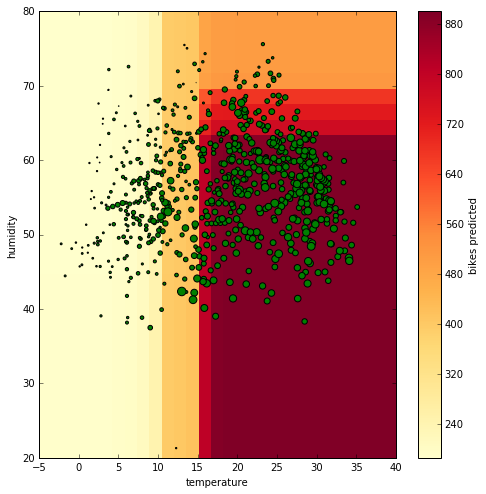

In [101]:
nx = 30
ny = 30
# creating a grid of points
x_temperature = np.linspace(-5, 40, nx)
y_humidity = np.linspace(20, 80, ny)
xx, yy = np.meshgrid(x_temperature, y_humidity)
# evaluating the regresson on all the points
z_bikes = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))


fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_temperature, y_humidity, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='bikes predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(bikes['temperature'], bikes['humidity'], s=bikes['count']/25.0, c='g')
# setting the limit for each axis
plt.xlim(np.min(x_temperature), np.max(x_temperature))
plt.ylim(np.min(y_humidity), np.max(y_humidity))
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.show()

plt.show()

In [102]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(bikes['count'], regressor.predict(bikes[['temperature','humidity']]))

173.17082135634402

In [103]:
from sklearn.cross_validation import cross_val_score
scores = -cross_val_score(regressor, bikes[['temperature', 'humidity']], 
                          bikes['count'], scoring='mean_absolute_error', cv=10)

In [104]:
scores.mean()

210.57690242120216

# Gradient boosters

Gradient Boosting:

– Use a simple regression model to start

– Subsequent models predict the error residual of the previous predictions

– Overall prediction given by a weighted sum of the collection 

![gb1](images/gb1.png)
![gb2](images/gb2.png)

In [105]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor  #GBM algorithm
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

bikes = pd.read_csv('data/bikes.csv')
regressor = GradientBoostingRegressor(max_depth=2,n_estimators=1000, learning_rate=0.05)
regressor.fit(bikes[['temperature', 'humidity']], bikes['count'])

GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.05, loss='ls',
             max_depth=2, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

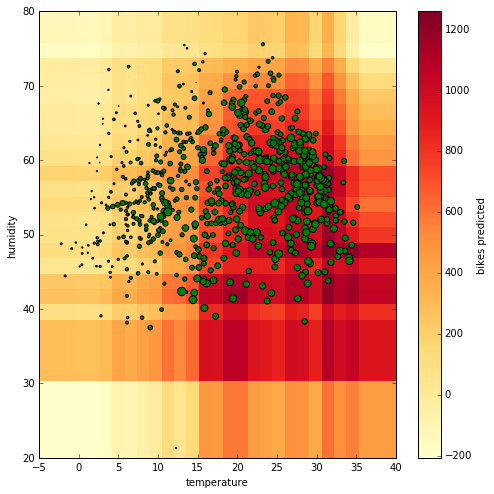

In [106]:
nx = 30
ny = 30
# creating a grid of points
x_temperature = np.linspace(-5, 40, nx)
y_humidity = np.linspace(20, 80, ny)
xx, yy = np.meshgrid(x_temperature, y_humidity)
# evaluating the regresson on all the points
z_bikes = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))


fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_temperature, y_humidity, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='bikes predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(bikes['temperature'], bikes['humidity'], s=bikes['count']/25.0, c='g')
# setting the limit for each axis
plt.xlim(np.min(x_temperature), np.max(x_temperature))
plt.ylim(np.min(y_humidity), np.max(y_humidity))
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.show()

plt.show()

In [107]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(bikes['count'], regressor.predict(bikes[['temperature','humidity']]))

104.58756410230531

In [108]:
from sklearn.cross_validation import cross_val_score
scores = -cross_val_score(regressor, bikes[['temperature', 'humidity']], 
                          bikes['count'], scoring='mean_absolute_error', cv=10)


scores.mean()

203.70655497363418

# SVM regression

![svr](images/svr.jpg)


In [109]:
import pandas as pd
from sklearn.svm import SVR
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

bikes = pd.read_csv('data/bikes.csv')
regressor = SVR()
regressor.fit(bikes[['temperature', 'humidity']], bikes['count'])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

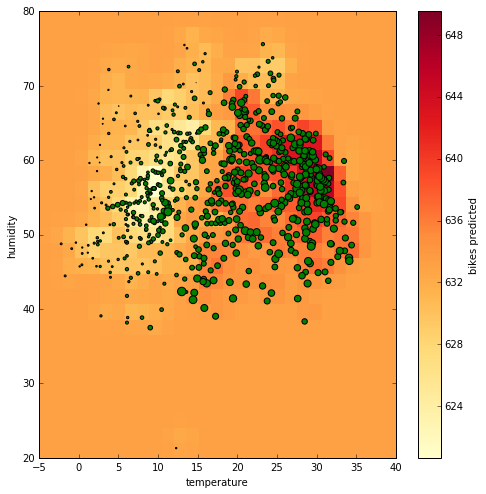

In [110]:
nx = 30
ny = 30
# creating a grid of points
x_temperature = np.linspace(-5, 40, nx)
y_humidity = np.linspace(20, 80, ny)
xx, yy = np.meshgrid(x_temperature, y_humidity)
# evaluating the regresson on all the points
z_bikes = regressor.predict(np.array([xx.flatten(), yy.flatten()]).T)
zz = np.reshape(z_bikes, (nx, ny))


fig = plt.figure(figsize=(8, 8))
# plotting the predictions
plt.pcolormesh(x_temperature, y_humidity, zz, cmap=plt.cm.YlOrRd)
plt.colorbar(label='bikes predicted') # add a colorbar on the right
# plotting also the observations
plt.scatter(bikes['temperature'], bikes['humidity'], s=bikes['count']/25.0, c='g')
# setting the limit for each axis
plt.xlim(np.min(x_temperature), np.max(x_temperature))
plt.ylim(np.min(y_humidity), np.max(y_humidity))
plt.xlabel('temperature')
plt.ylabel('humidity')
plt.show()

plt.show()

In [111]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(bikes['count'], regressor.predict(bikes[['temperature','humidity']]))

321.1636207694396

In [112]:
from sklearn.cross_validation import cross_val_score
scores = -cross_val_score(regressor, bikes[['temperature', 'humidity']], 
                          bikes['count'], scoring='mean_absolute_error', cv=10)


scores.mean()

363.74462717482004